<a href="https://colab.research.google.com/github/Ujjwal-21/BANK2/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

     |████████████████████████████████| 1.4 MB 8.2 MB/s 
     |████████████████████████████████| 9.8 MB 39.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
bank_data = pd.read_csv('/content/drive/MyDrive/bank.csv')

In [5]:
bank_data.head()

,Year,Banks,1. Cash in hand\n,2. Balances with RBI\n,3. Balances with banks in India\n,4. Money at call and short notice\n,5. Balances with banks outside India,6. Investments\n,6.1. Investments in India\n,(i) Government securities\n,...,8.1. Premises,8.2. Fixed assets under construction,8.3. Other Fixed assets\n,9. Other Assets,9.1. Inter-office adjustments (net)\n,9.2. Interest accrued \n,9.3. Tax paid\n,9.4. Stationery and Stamps\n,9.5. Others\n,Total Assets
0,2020,ALLAHABAD BANK,635.39,6731.22,6017.21,6800,1566.61,80666.58,80666.58,77071.73,...,3074.06,0.01,436.36,9109.91,-,1427.01,3130.63,21.94,4530.33,258002.12
1,NaN,ANDHRA BANK,1213.51,6515.79,17.01,-,3365.75,61331.17,61189.5,57620.03,...,1088.78,4.26,389.48,12203,-,1689.37,3586.91,13.02,6913.69,243871.06
2,NaN,BANK OF BARODA,4761.6,27884.25,4696.64,23742.67,60815.96,274614.61,262017.44,244056.07,...,7413.59,0,1475.7,62389.76,-,6678.18,8274.92,9.32,47427.33,1157915.52
3,NaN,BANK OF INDIA,3230.02,26009.23,1227.36,20634.79,35354.9,158572.99,151752.43,139794.5,...,1252.97,6692.61,1036.41,34100.88,-,3066.51,5777.49,6.42,25250.46,656995.48
4,NaN,BANK OF MAHARASHTRA,812.11,9541.57,54.54,-,38.74,57740.85,57740.85,45638.08,...,1350.53,71.77,253.89,12131.52,657.95,1088.39,291.37,3.2,10090.62,168867.18


In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('/content/drive/MyDrive/bank.csv')
stock_data

,Year,Banks,1. Cash in hand\n,2. Balances with RBI\n,3. Balances with banks in India\n,4. Money at call and short notice\n,5. Balances with banks outside India,6. Investments\n,6.1. Investments in India\n,(i) Government securities\n,...,8.1. Premises,8.2. Fixed assets under construction,8.3. Other Fixed assets\n,9. Other Assets,9.1. Inter-office adjustments (net)\n,9.2. Interest accrued \n,9.3. Tax paid\n,9.4. Stationery and Stamps\n,9.5. Others\n,Total Assets
0,2020,ALLAHABAD BANK,635.39,6731.22,6017.21,6800,1566.61,80666.58,80666.58,77071.73,...,3074.06,0.01,436.36,9109.91,-,1427.01,3130.63,21.94,4530.33,258002.12
1,NaN,ANDHRA BANK,1213.51,6515.79,17.01,-,3365.75,61331.17,61189.5,57620.03,...,1088.78,4.26,389.48,12203,-,1689.37,3586.91,13.02,6913.69,243871.06
2,NaN,BANK OF BARODA,4761.6,27884.25,4696.64,23742.67,60815.96,274614.61,262017.44,244056.07,...,7413.59,0,1475.7,62389.76,-,6678.18,8274.92,9.32,47427.33,1157915.52
3,NaN,BANK OF INDIA,3230.02,26009.23,1227.36,20634.79,35354.9,158572.99,151752.43,139794.5,...,1252.97,6692.61,1036.41,34100.88,-,3066.51,5777.49,6.42,25250.46,656995.48
4,NaN,BANK OF MAHARASHTRA,812.11,9541.57,54.54,-,38.74,57740.85,57740.85,45638.08,...,1350.53,71.77,253.89,12131.52,657.95,1088.39,291.37,3.2,10090.62,168867.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,NaN,INDIA POST PAYMENTS BANK LIMITED,1035,-460.99,0.56,39.35,-,-,-,-,...,-,-,-,-,-,216.22,1645.27,NaN,NaN,NaN
3080,NaN,PAYMENTS BANKS,1035,-460.99,0.56,39.35,-,-,-,-,...,-,-,-,-,-,216.22,1645.27,NaN,NaN,NaN
3081,NaN,ALL SCHEDULED COMMERCIAL BANKS,190801.73,1282207.65,301124.81,94867.04,660849.9,14207.24,20056.5,70731.09,...,67952.33,12719.1,65200.18,-,172.06,724206.51,18014424.92,NaN,NaN,NaN
3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
selected_features= ['Year','1.     Cash in hand','2.     Balances with RBI','3.     Balances with banks in India','4.     Money at call and short notice','5.     Balances with banks outside India','6.     Investments','         6.1.       Investments in India','Government securities','Premises','Fixed assets under construction','Other Fixed assets','Other Assets','Inter-office adjustments (net)','Interest accrued ','Tax paid',' Stationery and Stamps','Others','Total Assets']
print(selected_features)

['Year', '1.     Cash in hand', '2.     Balances with RBI', '3.     Balances with banks in India', '4.     Money at call and short notice', '5.     Balances with banks outside India', '6.     Investments', '         6.1.       Investments in India', 'Government securities', 'Premises', 'Fixed assets under construction', 'Other Fixed assets', 'Other Assets', 'Inter-office adjustments (net)', 'Interest accrued ', 'Tax paid', ' Stationery and Stamps', 'Others', 'Total Assets']


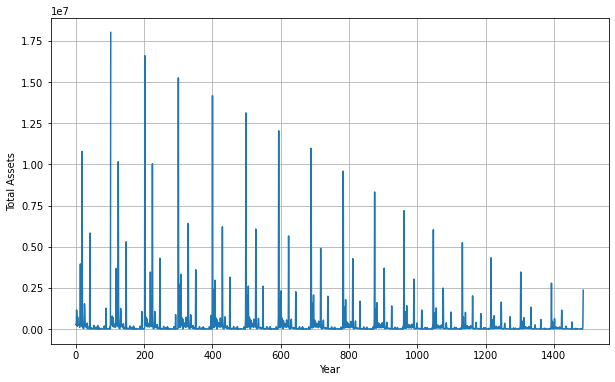

In [9]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Total Assets')
plt.plot(stock_data['Total Assets'])

plt.show()

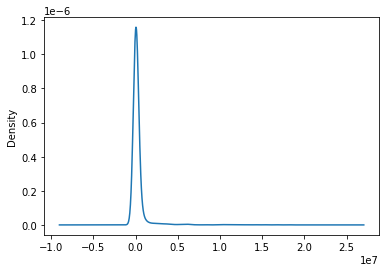

In [10]:
#Distribution of the dataset
df_close = stock_data['Total Assets']
df_close.plot(kind='kde')

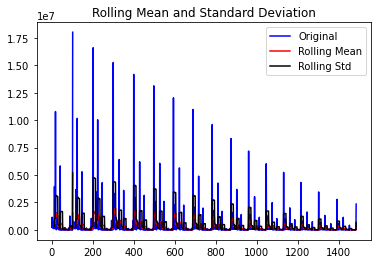

Results of dickey fuller test


MissingDataError: ignored

In [11]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

No handles with labels found to put in legend.


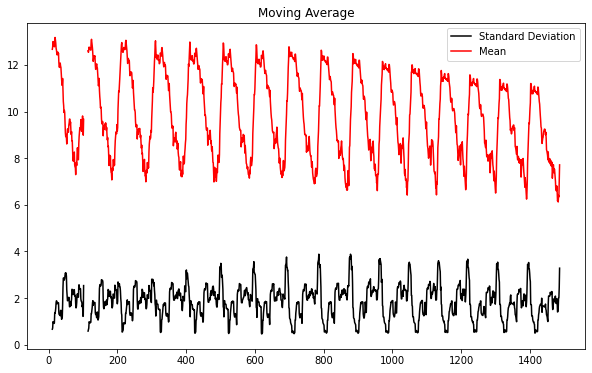

In [12]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

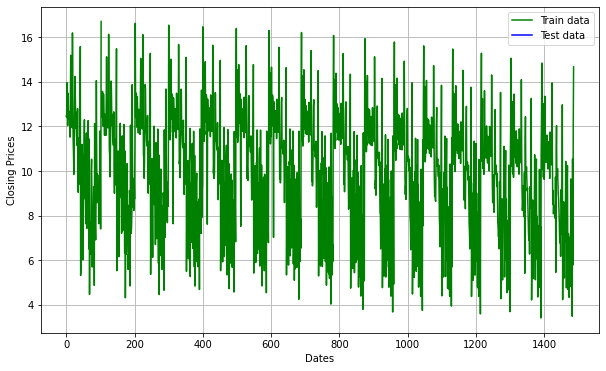

In [13]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()